# Ganancias y riesgos potenciales.

# Indice

1. [Descripción del proyecto.](#Descripción-del-proyecto.).
2. [Introducción.](#Introducción.)
3. [Pasos iniciales.](#Pasos-iniciales.)
4. [Entrenamiento y prueba del modelo.](#Entrenamiento-y-prueba-del-modelo.)
5. [Calculando ganancias y riesgos.](#Calculando-ganancias-y-riesgos.)
6. [Conclusión.](#Conclusión.)

## Descripción del proyecto.

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.
Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

## Introducción.

La industria petrolera enfrenta continuamente el desafío de maximizar la rentabilidad en proyectos de exploración y extracción de petróleo. Este proyecto, en colaboración con **OilyGiant**, busca identificar las ubicaciones más rentables para la construcción de **200 pozos de petróleo** en una de las tres regiones candidatas, optimizando así el uso del capital y los recursos. La meta final es elegir la región con el mayor potencial de beneficios y el menor riesgo de pérdida, basándonos en modelos predictivos y en un análisis de riesgo detallado.

Para lograr este objetivo, se cuenta con datos geológicos detallados de cada región, que incluyen la calidad del crudo y el volumen estimado de reservas. Estos datos serán utilizados para desarrollar un **modelo de regresión lineal** capaz de predecir el volumen de reservas en pozos no perforados aún. Posteriormente, se evaluarán los pozos con las reservas más altas y se calcularán los ingresos brutos estimados para cada región. Utilizando la técnica de **bootstrapping**, se estimarán tanto los beneficios como los riesgos potenciales, y solo se considerarán las regiones con un riesgo de pérdida menor al **2.5%**.

La selección final de la región se basará en los siguientes pasos:

1. **Análisis Exploratorio de los Datos**: Cargar y explorar los archivos geológicos de las tres regiones (`geo_data_0`, `geo_data_1` y `geo_data_2`) para obtener una comprensión inicial de las reservas disponibles y las características de los pozos.

2. **Entrenamiento del Modelo Predictivo**: Crear un modelo de **regresión lineal** que prediga el volumen de reservas en pozos no perforados con base en tres características clave de cada punto.

3. **Evaluación de Rentabilidad**: Seleccionar los **200 pozos con mayores reservas** en cada región y calcular el ingreso bruto estimado para los pozos seleccionados, utilizando el precio de **4.5 USD por barril** (con un volumen de reserva de 1000 barriles por unidad).

4. **Análisis de Riesgo con Bootstrapping**: Emplear bootstrapping para calcular el **intervalo de confianza del 95%** y evaluar el riesgo de pérdida en cada región, asegurando que este riesgo sea inferior al 2.5%.

5. **Selección de la Región Óptima**: Finalmente, elegir la región que maximice los beneficios esperados y cumpla con el criterio de bajo riesgo.

La inversión inicial estimada para desarrollar los 200 pozos es de **100 millones de dólares**, por lo que cada pozo deberá cumplir con los criterios de rentabilidad establecidos. Con este análisis integral, esperamos proporcionar una recomendación sólida sobre la región que mejor maximizará la rentabilidad y el retorno de inversión de **OilyGiant**.

## Pasos iniciales.
En esta sección, se llevará a cabo la carga de todas las librerías esenciales para el desarrollo del proyecto. Asimismo, se procederá a importar los datos desde archivos CSV, almacenándolos en DataFrames de pandas para facilitar su manipulación y análisis. Por último, se realizará una exploración inicial de los datos, permitiendo obtener una visión general y detectar posibles tendencias o anomalías.

### Inicialización.

La carga de librerías es un paso fundamental en el desarrollo de cualquier proyecto. En este caso particular, se utilizarán las siguientes:

1. **matplotlib**: para la creación de gráficos que permitan visualizar los datos.
2. **pandas**: para la manipulación y análisis de los datos proporcionados para el proyecto.
3. **numpy**: específicamente su módulo `random`, para garantizar la reproducibilidad de los resultados al entrenar modelos y realizar predicciones.
4. **IPython**: se usará el módulo `display` para imprimir múltiples tablas en una sola celda, facilitando la visualización de los datos.
5. **sklearn**: para todas las tareas relacionadas con machine learning.

Con estas librerías se implementará el desarrollo del proyecto.

In [1]:
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Cargar datos.

Los archivos CSV se cargarán en tres DataFrames diferentes: `df_geo_data_0`, `df_geo_data_1` y `df_geo_data_2`. Estos DataFrames serán la base de los análisis y las operaciones de manipulación de datos a lo largo del proyecto.

In [2]:
df_geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')

df_geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')

df_geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')


### Exploración de datos (EDA).

En esta sección se realizará una exploración preliminar del conjunto de datos, con el objetivo de identificar posibles errores y comprender su estructura general. Este análisis inicial permitirá detectar inconsistencias, valores faltantes y otros problemas.

In [3]:
# La funcion e_d_a() recibe un DateFrame e imprime en el display información general.
def e_d_a( df:pd.DataFrame ):
    print('###Información general del Data Frame###\n')
    display(df.info())
    print('\n###Estadisticas generales del Data Frame###')
    display(df.describe())
    print('\n###Muestras aleatorias de los datos###')
    display(df.sample(10))

La función `e_d_a()` será de gran utilidad en esta sección, ya que evitará la repetición de código. Esta función recibe un DataFrame de pandas como parámetro y aplica los métodos `info()`, `describe()` y `sample()` para proporcionar una visión general de los datos. Posteriormente, imprime los gráficos correspondientes en pantalla, facilitando la exploración inicial de los datos.

#### Data Frame df_geo_data_0.

In [4]:
e_d_a(df_geo_data_0)

###Información general del Data Frame###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


###Estadisticas generales del Data Frame###


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347



###Muestras aleatorias de los datos###


,id,f0,f1,f2,product
82487,NXG5D,0.848795,0.104505,4.946687,33.689280
79796,TsQ9t,0.252998,1.044214,2.336749,59.375148
2680,5MW2e,-0.340289,1.087822,2.387854,119.196846
64837,IGwB7,0.752871,-0.326420,2.488522,112.919037
24787,D1dxL,1.035246,-0.435600,4.213503,149.349302
38646,yQvQp,-0.977934,0.405496,1.366078,36.678043
77176,XS6uz,0.039859,0.320448,4.370007,107.220505
40823,UTf7x,-0.736263,0.434236,4.406430,127.400292
75275,PBtzy,1.685613,-0.120671,-0.910162,77.373111
28373,NKZm3,0.659335,-0.406632,8.716707,181.571616


#### Data Frame df_geo_data_1.

In [5]:
e_d_a(df_geo_data_1)

###Información general del Data Frame###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


###Estadisticas generales del Data Frame###


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408



###Muestras aleatorias de los datos###


,id,f0,f1,f2,product
16909,0tDgJ,15.998475,-4.177209,2.997345,80.859783
32069,5kYxM,12.484673,-7.934629,1.005238,26.953261
43270,kXd3p,11.506736,-5.162796,0.009030,0.000000
25564,hgJ0M,-14.962292,-4.417217,3.998374,110.992147
1130,MZ7iK,4.733250,-11.416585,1.006078,26.953261
98145,Arggo,-1.478288,-9.290805,2.994644,84.038886
25499,zVT98,9.930343,0.033132,5.004428,134.766305
20468,TdpP5,-9.320191,-19.662348,0.998898,30.132364
91882,Lbut4,-1.943497,-1.684430,2.002304,57.085625
7738,kn1sG,4.320606,-6.471795,-0.008805,0.000000


#### Data Frame df_geo_data_2.

In [6]:
e_d_a(df_geo_data_2)

###Información general del Data Frame###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


###Estadisticas generales del Data Frame###


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838



###Muestras aleatorias de los datos###


,id,f0,f1,f2,product
72255,3L95c,0.709355,-2.103284,9.255990,165.748832
37613,qel4N,2.635663,0.276385,6.874464,81.332350
68934,TdNXL,0.651572,-3.847421,2.768356,157.412843
91066,s1w5X,1.798775,2.196174,8.818360,150.275359
63181,scY1z,-1.118097,-0.040658,7.561993,99.579702
13956,H4mqQ,3.864435,1.974888,7.964040,159.197706
20082,PizAy,0.355675,2.004378,0.518160,3.121821
39476,9ZjG3,1.244497,-2.578916,-2.725206,103.287771
37,FmeFh,1.549409,-0.263697,2.151824,112.645805
74281,tApbF,0.487545,-5.375987,6.091818,109.730649


#### Resumen de la exploración de datos.

La exploración inicial de datos revela que no existen errores en la estructura de los datos: los nombres de las columnas son comprensibles y están correctamente estandarizados, no hay datos faltantes, y los tipos de datos de cada columna son los adecuados.

Un aspecto importante a considerar es la eliminación de la columna `id` antes de entrenar el modelo. A diferencia de otras características, esta columna no aporta valor predictivo y podría interferir con el rendimiento del modelo. Además, dado que este proyecto requiere el uso de regresión lineal, es necesario asegurar que todas las características sean de tipo numérico, ya que este modelo no acepta datos categóricos o de texto.

## Entrenamiento y prueba del modelo.

Con los datos ya verificados y sin necesidad de correcciones, procedemos al entrenamiento y evaluación del modelo. El objetivo final será calcular, para cada conjunto de datos (`df_geo_data_0`, `df_geo_data_1` y `df_geo_data_2`), los siguientes resultados:

- El **RMSE** (Root Mean Square Error) del modelo, para evaluar su precisión.
- El **valor promedio de las reservas** predicho por el modelo.
- Los **valores predichos** por el modelo junto con los **valores reales**, los cuales serán útiles para aplicar posteriormente la técnica de *bootstrapping*, que permitirá estimar tanto las ganancias potenciales como los posibles riesgos.


In [7]:
def train_test_model( df:pd.DataFrame ):
    # Separamos features y target
    target = df['product']
    features = df.drop(['id','product'], axis = 1)
    
    
    # Realizamos el escalado de características.
    scaler = StandardScaler()
    scaler.fit( features)
    features = scaler.transform(features)
    
    # Dividimos en conjuntos de entrenamiento y validación.
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    #Comprobamos el tamaño de los conjuntos.
    print('Tamaño de los conjuntos obtenidos.')
    print(f'Conjunto de validación: features: {features_valid.shape}||target: {target_valid.shape}')
    print(f'Conjunto de entrenamiento: features: {features_train.shape}||target: {target_train.shape}')
    
    #Entrenamiento del modelo.
    model = LinearRegression()
    model.fit( features_train, target_train)
    
    # Predicciones del modelo.
    predictions = model.predict( features_valid )
    
    # Evaluación del modelo.
    rmse = mean_squared_error( target_valid, predictions, squared=False )
    
    
    print(f'\nEl valor promedio de las reservas según el modelo es de: {predictions.mean()}')
    print(f'El valor promedio de las reservas en realidad es de: {target.mean()}')
    print(f'El rmse obtenido por el modelo es: {rmse}')
    
    # Retornamos los valores predichos por el modelo así como los valores correctos.
    return [pd.Series(predictions), target]

Dado que el proceso para alcanzar el objetivo es idéntico para cada DataFrame, se ha optado por crear la función `train_test_model()`. Esta función se encargará de entrenar el modelo, realizar predicciones y evaluar el RMSE para cada DataFrame. Al centralizar estas operaciones en una única función, se evita la duplicación de código y se mantiene una estructura más limpia y eficiente.

In [8]:
model_0_predictions, model_0_true = train_test_model(df_geo_data_0)

Tamaño de los conjuntos obtenidos.
Conjunto de validación: features: (25000, 3)||target: (25000,)
Conjunto de entrenamiento: features: (75000, 3)||target: (75000,)

El valor promedio de las reservas según el modelo es de: 92.59256778438035
El valor promedio de las reservas en realidad es de: 92.50000000000001
El rmse obtenido por el modelo es: 37.5794217150813


Después de utilizar la función `train_test_model()` con el DataFrame `df_geo_data_0`, se observa que los valores promedio de reservas de petróleo son muy similares tanto para los datos predichos por el modelo como para los datos reales. Sin embargo, el RMSE es de aproximadamente 37.5, lo cual sugiere que existe una variación significativa en las predicciones del modelo.

In [9]:
model_1_predictions, model_1_true = train_test_model(df_geo_data_1)

Tamaño de los conjuntos obtenidos.
Conjunto de validación: features: (25000, 3)||target: (25000,)
Conjunto de entrenamiento: features: (75000, 3)||target: (75000,)

El valor promedio de las reservas según el modelo es de: 68.72854689544602
El valor promedio de las reservas en realidad es de: 68.82500000000002
El rmse obtenido por el modelo es: 0.8930992867756171


In [ ]:
En el DataFrame `df_geo_data_1`, se observa que el valor promedio de las reservas de petróleo es muy similar entre los valores predichos por el modelo y los valores reales. Sin embargo, el promedio de reservas es bajo, ya que, para que un pozo de petróleo sea rentable, debería tener reservas de al menos 111.1 unidades. Esto sugiere que en esta región los riesgos de pérdida podrían ser mayores.

Otro aspecto relevante es el RMSE del modelo en este DataFrame, el cual es muy bajo. Esto indica que el modelo está prediciendo los valores con alta precisión para esta región.

model_2_predictions, model_2_true = train_test_model(df_geo_data_2)

Los resultados para el DataFrame `df_geo_data_2` son muy similares a los obtenidos en `df_geo_data_0`. Las medias de las reservas de petróleo son prácticamente iguales entre los valores predichos por el modelo y los valores reales. Además, el RMSE obtenido no es particularmente bajo, lo cual sugiere una variación moderada en las predicciones del modelo para esta región.

### Conclusión de la sección.

Los conjuntos de datos `df_geo_data_2` y `df_geo_data_0` presentan las reservas promedio más altas en comparación con otros, aunque estas siguen estando por debajo del umbral de rentabilidad requerido, que es de 111.1 unidades. En las secciones posteriores, se analizarán más a fondo la rentabilidad y los riesgos asociados a estas reservas.

## Calculando ganancias y riesgos.

En esta sección se evaluarán tanto las ganancias como los riesgos asociados, considerando los siguientes puntos clave:

1. **Selección de pozos**: OilyGiant planea estudiar 500 pozos de petróleo, de los cuales se seleccionarán los 200 con mayor calidad de crudo.
2. **Costo de inversión**: La empresa invertirá 100 millones de dólares en la construcción de 200 pozos, lo que representa un costo promedio de 500,000 dólares por pozo.
3. **Umbral de rentabilidad**: Un pozo será considerado rentable si contiene al menos 111.1 unidades de petróleo.
4. **Ingreso por unidad**: Cada barril de petróleo genera 4.5 dólares, y cada unidad de petróleo contiene 1,000 barriles, generando así un ingreso de 4,500 dólares por unidad de petróleo.

El cálculo de ganancias y evaluación de riesgos seguirá estos pasos:

1. Seleccionar los 500 pozos con mayores reservas de petróleo, según los valores predichos por el modelo.
2. Aplicar la técnica de *bootstrapping*, tomando 1,000 muestras de 200 pozos cada una y calculando el ingreso generado por cada muestra.
3. Para cada muestra de 200 pozos, calcular el ingreso total sumando las reservas de petróleo y aplicando la fórmula:  
(costo de barril x total de unidades de petroleo x 1000) / 1000000. = beneficio en millones de dolares.

4. Calcular el ingreso promedio de todas las muestras tomadas.
5. A partir de la distribución de ingresos obtenida, calcular el intervalo de confianza y evaluar el riesgo de pérdidas.

Este procedimiento se aplicará a cada región para obtener una evaluación integral de ganancias y riesgos.


In [11]:
def gross_income( data:pd.Series, cost_barrel:float = 3.0 ):
    # Calculamos el total de las reservas de petroleo en los 200 pozos 
    total_product = data.sum()
    # Calculamos el ingreso total
    income = (total_product * cost_barrel * 1000) / 1000000
    
    return income

Dado que el proceso para calcular las ganancias y los riesgos es el mismo en cada región, se implementarán diferentes funciones. Esto permitirá evitar la repetición de código y mantener una estructura más legible y organizada.


La primera función es `gross_income()`. Esta función es sencilla y tiene como único propósito calcular el ingreso bruto obtenido a partir de una muestra de pozos.

In [12]:
def plot_hist( data ): 
    fig, axs = plt.subplots( figsize = [10,5])
#     axs.axvline(100)
    axs.hist( data )
    # configuramos el histograma.
    plt.title("Ingresos potenciales.")
    plt.xlabel("Ingreso en millones de dolares.")
    plt.ylabel("Frecuencia")
    plt.show()


La función `plot_hist()` tiene como único propósito generar un histograma con los datos obtenidos a partir del *bootstrapping*. Esto permitirá visualizar la distribución de los ingresos y obtener una idea más clara sobre su comportamiento.

In [13]:
def sort_cut( data:pd.Series, size:int):
    # Ordenamos los datos de mayor a menor
    data_sort = data.sort_values( ascending=False )
    # Seleccionamos los x valores indicados en size.
    data_sort = data_sort.iloc[0:size]
    
    return data_sort

La función `sort_cut()` se encargará de seleccionar los *x* valores más altos de una muestra de datos. Esta función será especialmente útil al aplicar el *bootstrapping*, ya que permitirá preparar los datos de cada región de manera eficiente.

In [14]:
def bootstrapping( data:pd.Series, cost_barrel:float = 3.0, repeat:int=100, graph:bool=True ):
    # llamamos a sort_cut() para seleccionar los 500 pozos más grandes.
    data = sort_cut( data, 500 )
    # Creamos un objeto RandomState para poder replicar los resultados del muestreo
    state = np.random.RandomState(12345)
    # En la lista values se almacenarán las ganancias de cada submuestra de pozos de petroleo.
    values = []
    # Aplicamos el bootstrapping
    for i in range(repeat):
        subsample = data.sample( n=200, replace=True, random_state=state )
        values.append( gross_income( subsample, cost_barrel) )
    # Graficamos los resultados obtenidos del bootstrapping si el usuario así lo desea.
    if graph:
        plot_hist( values )
    # Convertimos los valores a un Series de pandas para facilitar los calculos.
    values = pd.Series( values )
    # Calculamos los ingresos promedio
    avg = values.mean()
    # Calculamos el intervalo de confianza.
    confidence_interval = values.quantile( .05 )
    # Calculamos el riesgo de perdida.
    risk_loss = (( values[values<100].count() ) * 100) / 200
    
    # Imprimimos los resultados en pantalla.
    print(f'\nEl beneficio promedio es de: {round(avg, 3)} millones de dolares')
    print(f'\nSe tiene certeza del 95% de que los ingresos serán de almenos:{round(confidence_interval, 3)} millones de dolares')
    print(f'\nEl riesgo de perdida es de: {risk_loss}%')

La función `bootstrapping()` es la más importante del proceso. Su propósito es preparar los datos y ejecutar el *bootstrapping* para, posteriormente, calcular el beneficio promedio, el intervalo de confianza y el riesgo de pérdida. 

Dentro de esta función principal se llaman las funciones descritas anteriormente, como `gross_income()` y `plot_hist()`, integrando así todos los elementos necesarios para la evaluación completa de las ganancias y los riesgos.

### La máxima ganancia posible.

Antes de ejecutar la función `bootstrapping()` para cada región y obtener los datos solicitados, se calculará la ganancia máxima posible. Esto proporcionará una referencia sobre los beneficios máximos que podrían alcanzarse en cada región.

Para realizar este cálculo, se seleccionarán los 200 pozos con mayores reservas de cada región y se estimará el ingreso potencial.

In [15]:
# Calculamos el ingreso de los 200 pozos más grandes de la región.
region_0_max_income = gross_income( sort_cut( model_0_predictions, 200), 4.5 )

print( f'El ingreso más grande que se podría obtener es de: {region_0_max_income} millones de dolares')

El ingreso más grande que se podría obtener es de: 139.9604887746513 millones de dolares


In [16]:
# Calculamos el ingreso de los 200 pozos más grandes de la región.
region_1_max_income = gross_income( sort_cut( model_1_predictions, 200), 4.5 )

print( f'El ingreso más grande que se podría obtener es de: {region_1_max_income} millones de dolares')

El ingreso más grande que se podría obtener es de: 124.85712051973539 millones de dolares


In [17]:
# Calculamos el ingreso de los 200 pozos más grandes de la región.
region_2_max_income = gross_income( sort_cut( model_2_predictions, 200), 4.5 )

print( f'El ingreso más grande que se podría obtener es de: {region_2_max_income} millones de dolares')

El ingreso más grande que se podría obtener es de: 133.21754396243253 millones de dolares


### Región aparentemente  más rentable

Ahora que se ha obtenido la ganancia máxima posible en cada región, se puede concluir preliminarmente que la construcción de los 200 pozos debería realizarse en la **Región 0**, ya que esta región genera los mayores ingresos brutos. 

Esta es la conclusión basada en la información disponible hasta este punto. Sin embargo, el siguiente paso es realizar el *bootstrapping* para confirmar o descartar que la **Región 0** es la mejor opción para la construcción de los pozos, evaluando más a fondo los beneficios y riesgos asociados.

In [22]:
# Esta variable representa las repeticiones del bootstrapping.
repeat = 1000
# Esta variable representa el costo de un barril de petroleo.
cost_barrel = 4.5

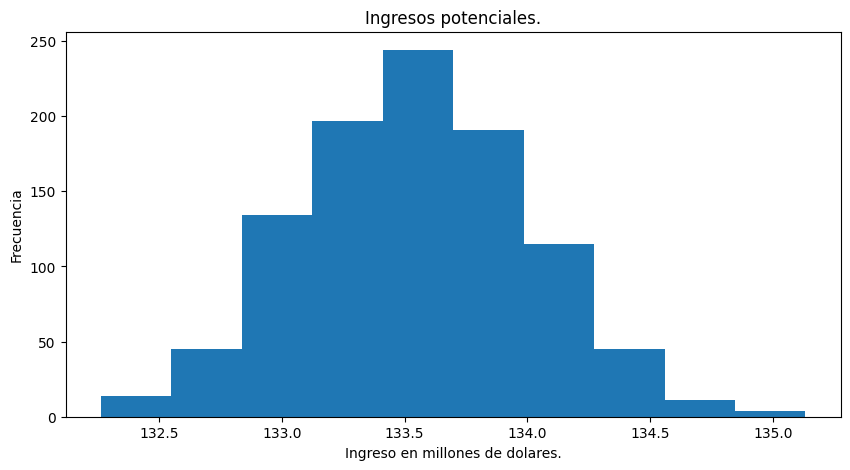


El beneficio promedio es de: 133.54 millones de dolares

Se tiene certeza del 95% de que los ingresos serán de almenos:132.787 millones de dolares

El riesgo de perdida es de: 0.0%


In [18]:
# Se calculan los valores solicitados para la región 0
bootstrapping( model_0_predictions, cost_barrel, repeat)

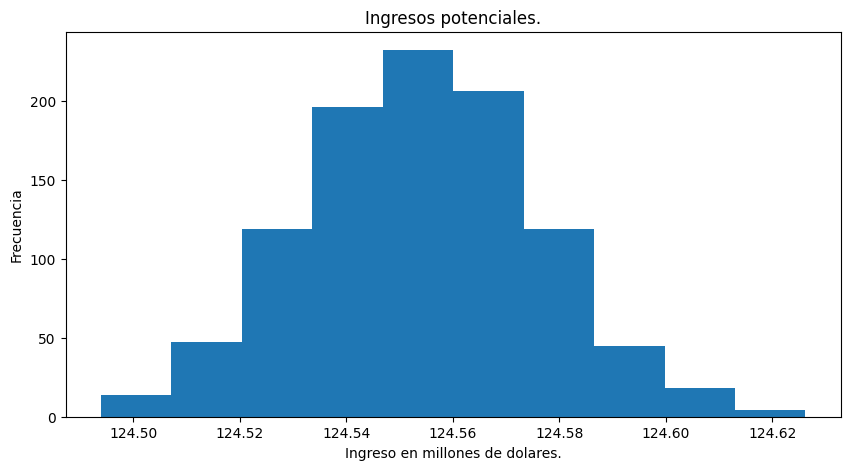


El beneficio promedio es de: 124.554 millones de dolares

Se tiene certeza del 95% de que los ingresos serán de almenos:124.518 millones de dolares

El riesgo de perdida es de: 0.0%


In [19]:
# Se calculan los valores solicitados para la región 1
bootstrapping( model_1_predictions, cost_barrel, repeat)


In [ ]:
# Se calculan los valores solicitados para la región 2
bootstrapping( model_2_predictions, cost_barrel, repeat)

## Conclusión.

Tras haber obtenido el promedio de ganancias brutas, el intervalo de confianza del 95% y el riesgo de pérdida, se observa que todas las regiones tienen un **riesgo de pérdidas del 0%**. Esto implica que cualquiera de las tres regiones podría ser considerada para la construcción de los pozos de petróleo. 

Sin embargo, un análisis más detallado indica que la **Región 0** genera las mayores ganancias brutas en comparación con las demás. Adicionalmente, el intervalo de confianza del 95% sugiere que existe una probabilidad del 95% de que los ingresos brutos en esta región alcancen al menos **132 millones de dólares**, superando significativamente a las otras regiones. Con base en estos datos, la Región 0 emerge como la candidata más adecuada para la construcción de los pozos.

Un aspecto relevante a tomar en cuenta es la distribución de los ingresos en cada región. La probabilidad de alcanzar la ganancia máxima o, al menos, una cercana a ella es bastante baja en todas las regiones, lo que indica que no sería prudente basar la decisión únicamente en el potencial de ganancias máximas. 

Aunque en este caso la Región 0 no solo cuenta con la ganancia máxima posible sino también con el mayor ingreso promedio, en otros escenarios, esto podría no ser así. Podría ocurrir que una región tenga pozos con las mayores reservas de petróleo, pero también contenga pozos con las reservas más bajas en comparación con otras regiones. En tales situaciones, centrarse únicamente en la ganancia máxima podría resultar engañoso.

Por lo tanto, es preferible elegir la región que ofrezca el ingreso promedio más alto y consistente. De esta manera, se optimiza la probabilidad de lograr una rentabilidad sostenida en el proyecto, reduciendo la exposición a resultados extremos que, aunque atractivos, tienen una menor probabilidad de ocurrencia.